# Hyperparameters Tuning

- This is a supplement material for the [Machine Learning Simplified](https://themlsbook.com) book. It sheds light on Python implementations of the topics discussed while all detailed explanations can be found in the book. 
- I also assume you know Python syntax and how it works. If you don't, I highly recommend you to take a break and get introduced to the language before going forward with my code. 
- This material can be downloaded as a Jupyter notebook (Download button in the upper-right corner -> `.ipynb`) to reproduce the code and play around with it. 



## 1. Required Libraries & Functions

Before we start, we need to import few libraries and functions that we will use in this jupyterbook. You don't need to understand what those functions do for now.

In [2]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn import tree

## 2. Probelm Representation

Let's recall Chapter 11 of [the Machine Learning Simplified book](https://themlsbook.com). We have a hypothetical dataset (Table 11.4) containing 14 days, with first 4 columns as features representing weather conditions and the last column as a target variable representing hours of golf that were played that day.

| Outlook | Humidity | Temperature | Wind | Golf Hours Played |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| Sunny | Hot | High | Weak | 25 |
| Sunny | Hot | High | Strong | 30 |
| Overcast | Hot | High | Weak | 46 |
| Rain | Mild | High | Weak | 45 |
| Rain | Cold | Normal | Weak | 52 |
| Rain | Cold | Normal | Strong | 23 |
| Overcast | Cold | Normal | Strong | 43 |
| Sunny | Mild | High | Weak | 35 |
| Sunny | Cold | Normal | Weak | 38 |
| Rain | Mild | Normal | Weak | 46 |
| Sunny | Mild | Normal | Strong | 48 |
| Overcast | Mild | High | Strong | 52 |
| Overcast | Hot | Normal | Weak | 44 |
| Rain | Mild | High | Strong | 30 |







### 2.1. Create Hypothetical Dataset

Let's re-create the aforementioned table in python. We use `pandas` library - a library that manages **PAN**el **DA**ta **S**ets - to do so. Note that we have already imported it in the beginning of this notebook.

In [4]:
#re-create a hypothetical dataset
data = {'Outlook': ["Sunny","Sunny","Overcast","Rain","Rain","Rain","Overcast","Sunny","Sunny","Rain","Sunny","Overcast","Overcast","Rain"], 
        'Humidity': ["Hot","Hot","Hot","Mild","Cold","Cold","Cold","Mild","Cold","Mild","Mild","Mild","Hot","Mild"],
        'Temperature': ["High","High","High","High","Normal","Normal","Normal","High","Normal","Normal","Normal","High","Normal","High"],
        'Wind': ["Weak","Strong","Weak","Weak","Weak","Strong","Strong","Weak","Weak","Weak","Strong","Strong","Weak","Strong"],
        'Hours': [25,30,46,45,52,23,43,35,38,46,48,52,44,30]
       }  

#transform dataset into a DataFrame df using pandas library
df = pd.DataFrame(data)  
  
#print the output
df


,Outlook,Humidity,Temperature,Wind,Hours
0,Sunny,Hot,High,Weak,25
1,Sunny,Hot,High,Strong,30
2,Overcast,Hot,High,Weak,46
3,Rain,Mild,High,Weak,45
4,Rain,Cold,Normal,Weak,52
5,Rain,Cold,Normal,Strong,23
6,Overcast,Cold,Normal,Strong,43
7,Sunny,Mild,High,Weak,35
8,Sunny,Cold,Normal,Weak,38
9,Rain,Mild,Normal,Weak,46


### 2.2. Prepare the Dataset

In [5]:
# One-hot encoding in pandas can be done using get_dummies function
df_enc = pd.get_dummies(df)
df_enc

,Hours,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Humidity_Cold,Humidity_Hot,Humidity_Mild,Temperature_High,Temperature_Normal,Wind_Strong,Wind_Weak
0,25,0,0,1,0,1,0,1,0,0,1
1,30,0,0,1,0,1,0,1,0,1,0
2,46,1,0,0,0,1,0,1,0,0,1
3,45,0,1,0,0,0,1,1,0,0,1
4,52,0,1,0,1,0,0,0,1,0,1
5,23,0,1,0,1,0,0,0,1,1,0
6,43,1,0,0,1,0,0,0,1,1,0
7,35,0,0,1,0,0,1,1,0,0,1
8,38,0,0,1,1,0,0,0,1,0,1
9,46,0,1,0,0,0,1,0,1,0,1


In [6]:
# Define X and y variables
X = df_enc[["Outlook_Overcast", "Outlook_Rain", "Outlook_Sunny", "Humidity_Cold", "Humidity_Hot", "Humidity_Mild", "Temperature_High", "Temperature_Normal", "Wind_Strong"]]
y = df_enc.Hours.values

In [7]:
# Print x and y
print(f'{X=}')
print(f'{y=}')

X=    Outlook_Overcast  Outlook_Rain  Outlook_Sunny  Humidity_Cold  \
0                  0             0              1              0   
1                  0             0              1              0   
2                  1             0              0              0   
3                  0             1              0              0   
4                  0             1              0              1   
5                  0             1              0              1   
6                  1             0              0              1   
7                  0             0              1              0   
8                  0             0              1              1   
9                  0             1              0              0   
10                 0             0              1              0   
11                 1             0              0              0   
12                 1             0              0              0   
13                 0             1            

## 3. Without setting any hyper-parameters

In [10]:
clf = DecisionTreeRegressor()
clf.fit(X, y)
print(f'Accuracy of Decision Tree classifier on training set: {clf.score(X, y):.2f}')

Accuracy of Decision Tree classifier on training set: 1.00


## 4. Tuning hyper-parameters

### 4.1. Controlling depth of a tree

In [ ]:
# Let i be a list with different tree depth 


# Initialize the model
clf = DecisionTreeRegressor(max_depth=1)
# Train the model
clf.fit(X, y)

## 2. Building different size trees

### 2.1. max_depth = 1

In [11]:
# Initialize the model
clf = DecisionTreeRegressor(max_depth=1)
# Train the model
clf.fit(X, y)

DecisionTreeRegressor(max_depth=1)

In [12]:
print(f'Accuracy of Decision Tree classifier on training set: {clf.score(X, y):.2f}')

Accuracy of Decision Tree classifier on training set: 0.40


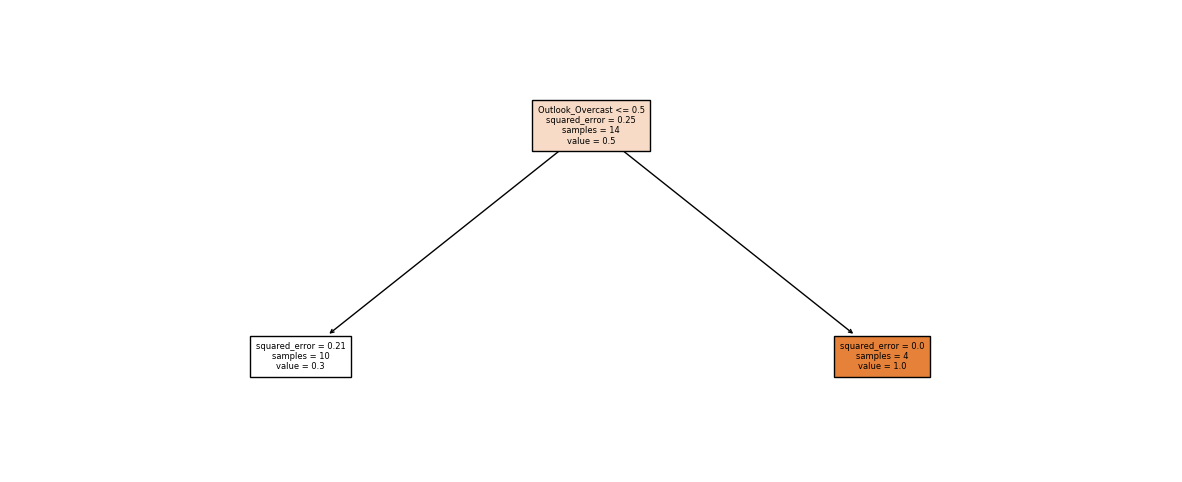

In [13]:
plt.figure(figsize=(15,6))
fig_tree = tree.plot_tree(clf,
                          fontsize=6,
                          feature_names=X.columns,
                          filled=True)

### 2.2. max_depth = 2

In [15]:
# Initialize the model
clf = DecisionTreeRegressor(max_depth=2)
# Train the model
clf.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [16]:
print(f'Accuracy of Decision Tree classifier on training set: {clf.score(X, y):.2f}')

Accuracy of Decision Tree classifier on training set: 0.42


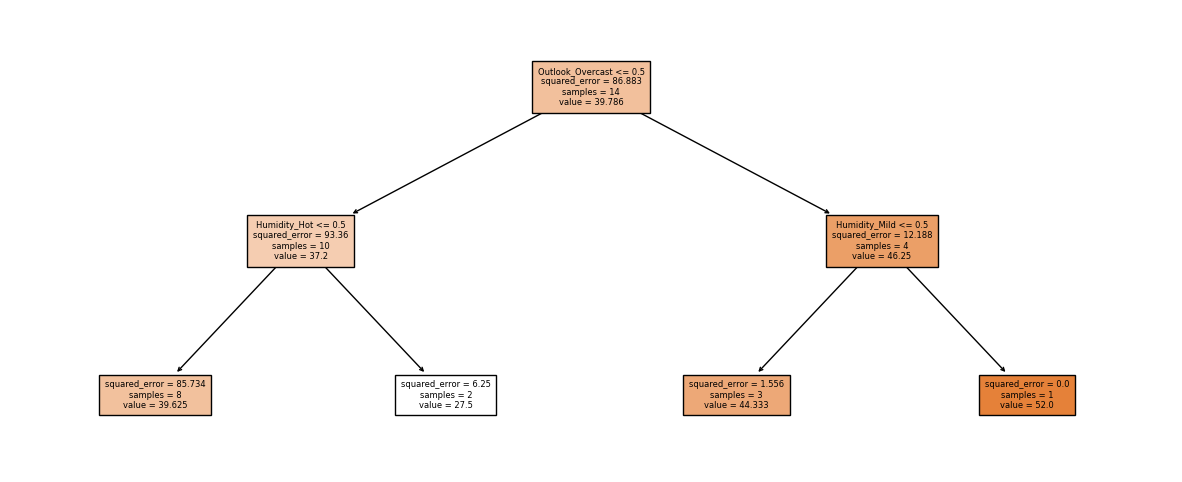

In [17]:
plt.figure(figsize=(15,6))
fig_tree = tree.plot_tree(clf,
                          fontsize=6,
                          feature_names=X.columns,
                          filled=True)

### 2.3. max_depth = 3

In [22]:
# Initialize the model
clf = DecisionTreeRegressor(max_depth=3)
# Train the model
clf.fit(X, y)

DecisionTreeRegressor(max_depth=3)

In [23]:
print(f'Accuracy of Decision Tree classifier on training set: {clf.score(X, y):.2f}')

Accuracy of Decision Tree classifier on training set: 0.58


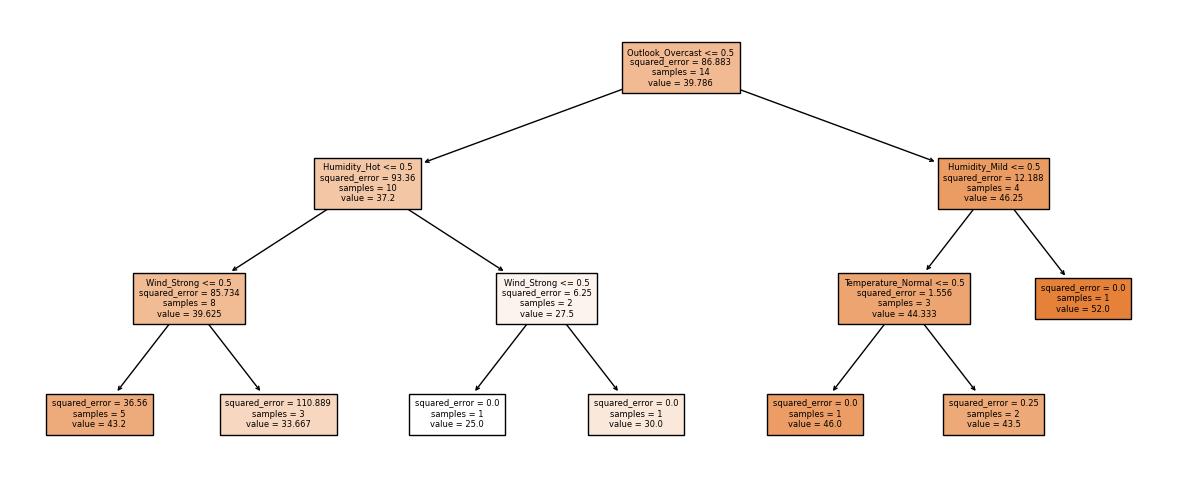

In [24]:
plt.figure(figsize=(15,6))
fig_tree = tree.plot_tree(clf,
                          fontsize=6,
                          feature_names=X.columns,
                          filled=True)

## max_features

In [65]:
for i in range(1,4):
    # Initialize the model
    clf = DecisionTreeRegressor(max_features=i)
    # Train the model
    clf.fit(X, y)
    #score
    print(clf.score(X, y))

1.0
1.0
1.0


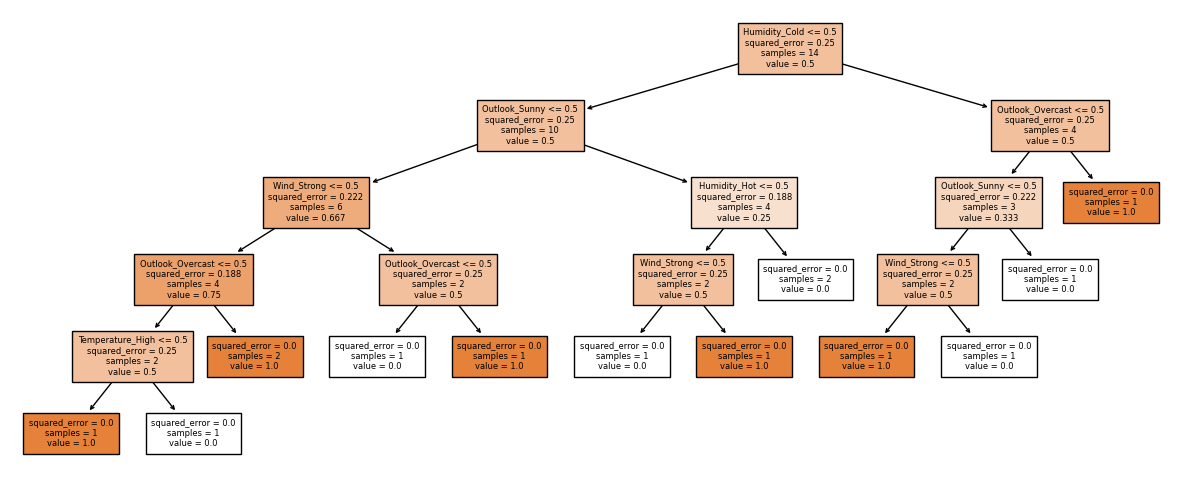

In [61]:
plt.figure(figsize=(15,6))
fig_tree = tree.plot_tree(clf,
                          fontsize=6,
                          feature_names=X.columns,
                          filled=True)

## Specifying minimum samples before split

In [25]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20)
dt_min_split.fit(X_train, y_train)

NameError: name 'DecisionTreeClassifier' is not defined

## Specifying minimum samples in leaf node

## Using Entropy instead of Gini

In [18]:
a = zip(depth, criterion)

In [19]:
print(a)

## Hyper-parameter tuning

## GridSearch

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [59]:
depth = [1,2,3]
criterion = ['gini', 'entropy']
scores = []


for depth_choice in depth:
    for criterion_choice in criterion:
        clf = DecisionTreeClassifier(max_depth=depth_choice, 
                                     criterion=criterion_choice,
                                     random_state=125)
        clf.fit(X_train, y_train)
        
        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        
        print(f"depth = {depth_choice}, criterion = {criterion_choice}, train_score = {train_score}, test_score = {test_score}")



depth = 1, criterion = gini, train_score = 0.9, test_score = 0.5
depth = 1, criterion = entropy, train_score = 0.9, test_score = 0.5
depth = 2, criterion = gini, train_score = 0.9, test_score = 0.5
depth = 2, criterion = entropy, train_score = 0.9, test_score = 0.5
depth = 3, criterion = gini, train_score = 1.0, test_score = 0.5
depth = 3, criterion = entropy, train_score = 1.0, test_score = 0.5


In [71]:
# depth = [1,2,3]
max_leaf_nodes = [2,3,4,5,6]
scores = []


for max_leaf_choice in max_leaf_nodes:
    clf = DecisionTreeClassifier(max_leaf_nodes=max_leaf_choice,
                                 random_state=125)
    clf.fit(X_train, y_train)

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    print(f"max_leaf_nodes = {max_leaf_choice}, train_score = {train_score}, test_score = {test_score}")



max_leaf_nodes = 2, train_score = 0.9, test_score = 0.5
max_leaf_nodes = 3, train_score = 0.9, test_score = 0.5
max_leaf_nodes = 4, train_score = 1.0, test_score = 0.5
max_leaf_nodes = 5, train_score = 1.0, test_score = 0.5
max_leaf_nodes = 6, train_score = 1.0, test_score = 0.5


In [ ]:
# https://towardsdatascience.com/bayesian-optimization-for-hyperparameter-tuning-how-and-why-655b0ee0b399

# using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "classifier__learning_rate": [0.0001, 0.0005, 0.001, 0.01, 0.1],
    "classifier__n_estimators": [100, 300, 600, 800, 1000],
    "classifier__max_depth": [ 4, 20, 100, 250, 400] 
}

# grid
reg_grid = GridSearchCV(pipe,
                        param_grid=param_grid,
                        cv=5,
                        n_jobs=8, 
                        scoring='roc_auc'
                       )

model_grid = reg_grid.fit(X, y)